In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
ev = pd.read_csv('Indian automoble buying behavour study 1.0.csv')
ev.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [5]:
ev.shape

(99, 13)

In [6]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [7]:
ev.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [8]:
ev.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [10]:
print(ev.duplicated().sum())

0


**<font size="5">Demographic Analysis</font>**

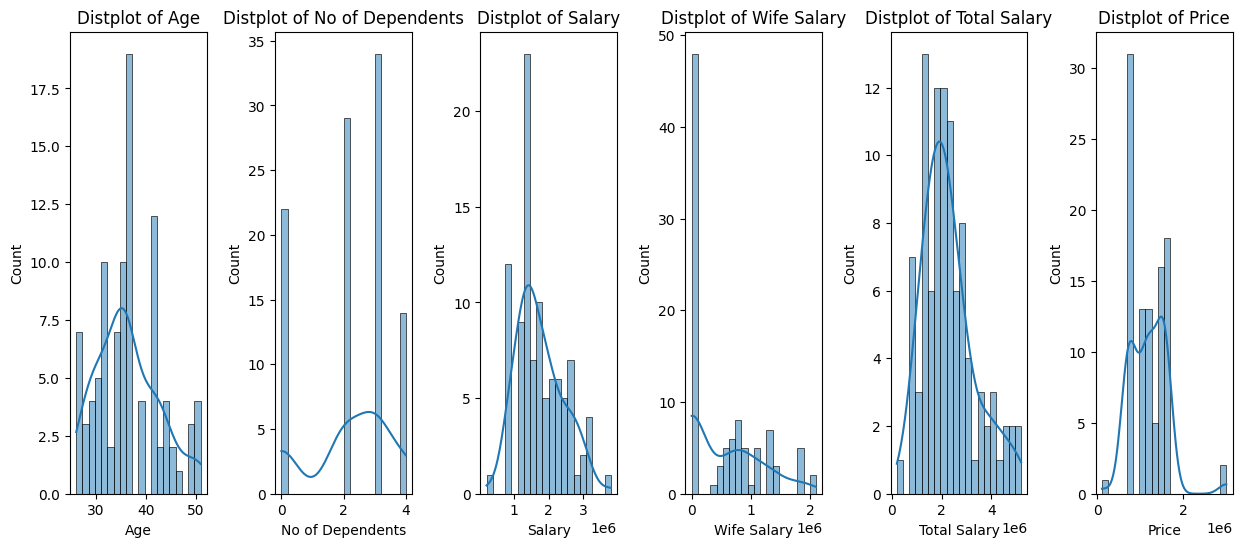

In [11]:
# Define the figure size
plt.figure(figsize=(15, 6))

#List of columns to plot
columns = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']

#Create subplots 
for i, col in enumerate(columns, 1):
    plt.subplot(1, 6, i)  
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  
    sns.histplot(ev[col], bins=20, kde=True)  
    plt.title(f'Distplot of {col}')

plt.show()

**Age group between 20 to 50 has the highest density.**

**Most people have a total salary of 40 lakh.**

**Wives of most of the people do not go for work.**

**Most people spent around 10 to 30 lakhs for cars.**

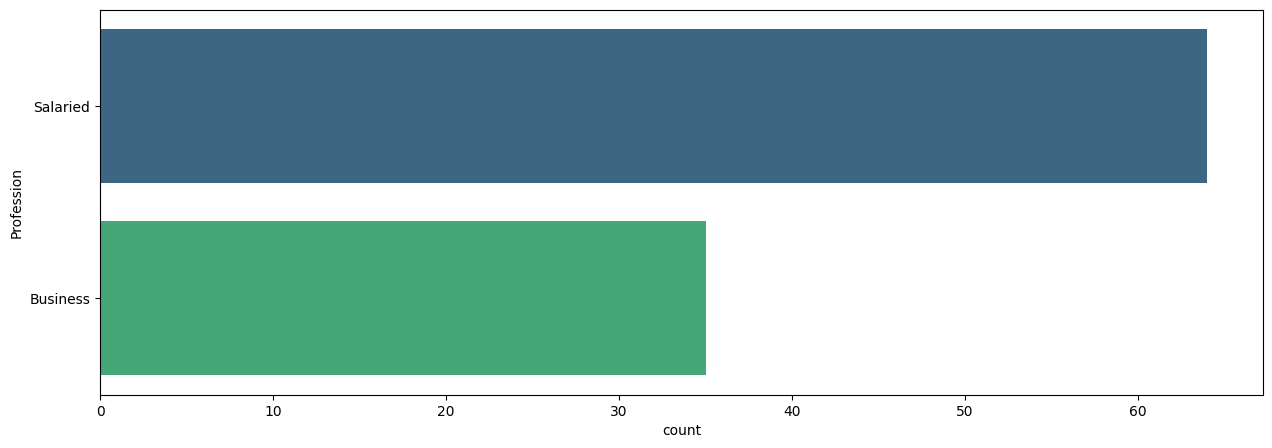

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(y='Profession', data=ev, hue='Profession', palette='viridis', legend=False)
plt.show()

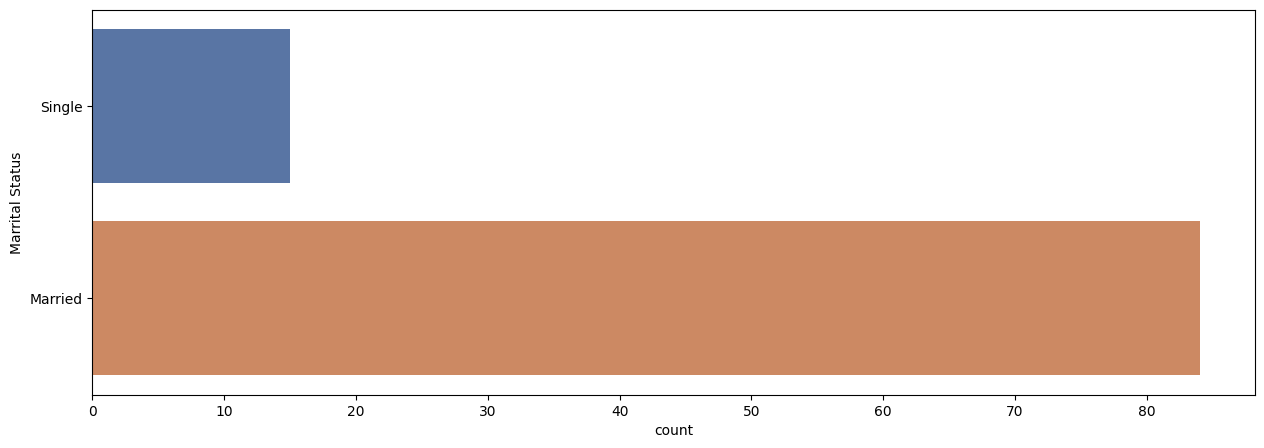

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(y='Marrital Status',data=ev, hue='Marrital Status', palette='deep', legend=False)
plt.show()

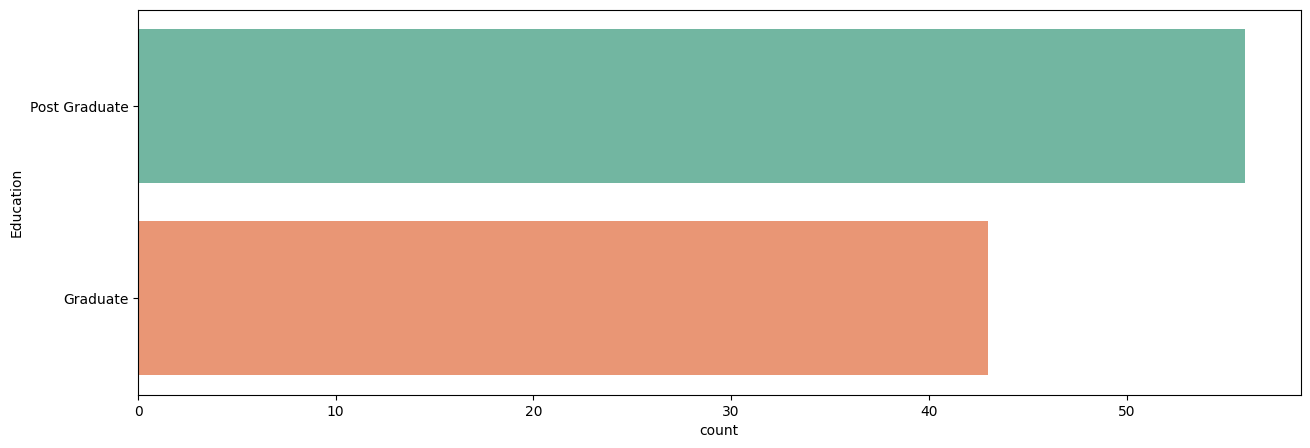

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(y='Education',data=ev, hue='Education', palette='Set2', legend=False)
plt.show()

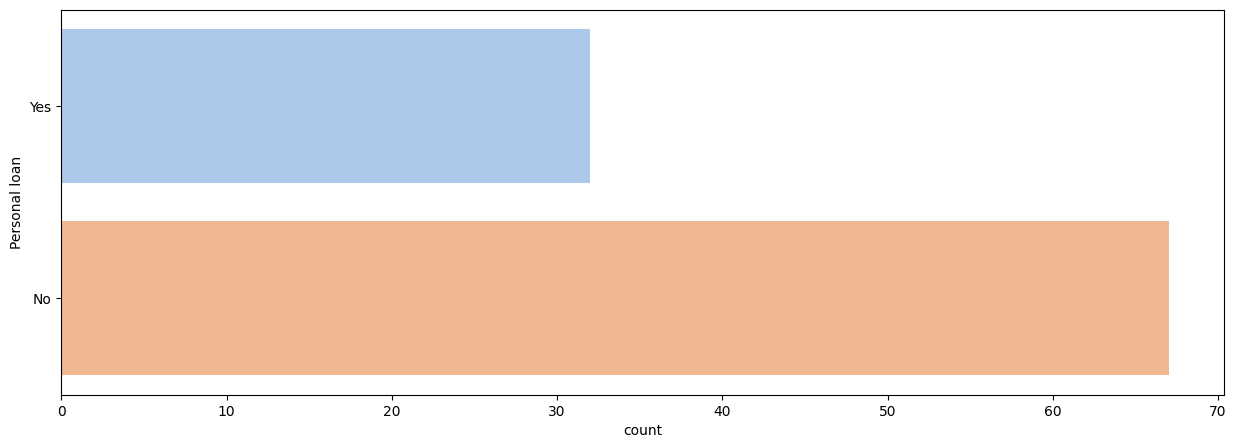

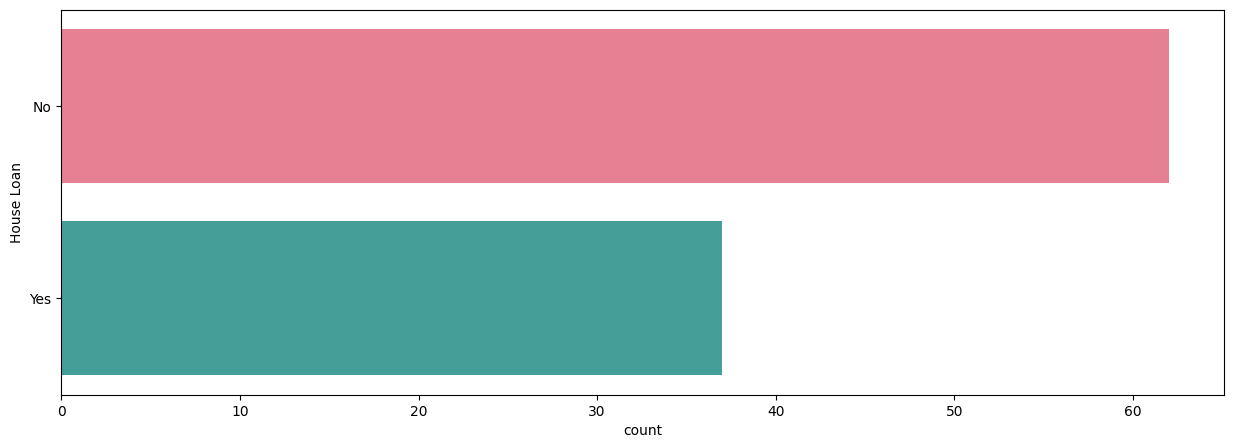

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(y='Personal loan', data=ev, hue='Personal loan', palette='pastel', legend=False)
plt.show()
plt.figure(figsize=(15,5))
sns.countplot(y='House Loan', data=ev, hue='House Loan', palette='husl', legend=False)
plt.show()

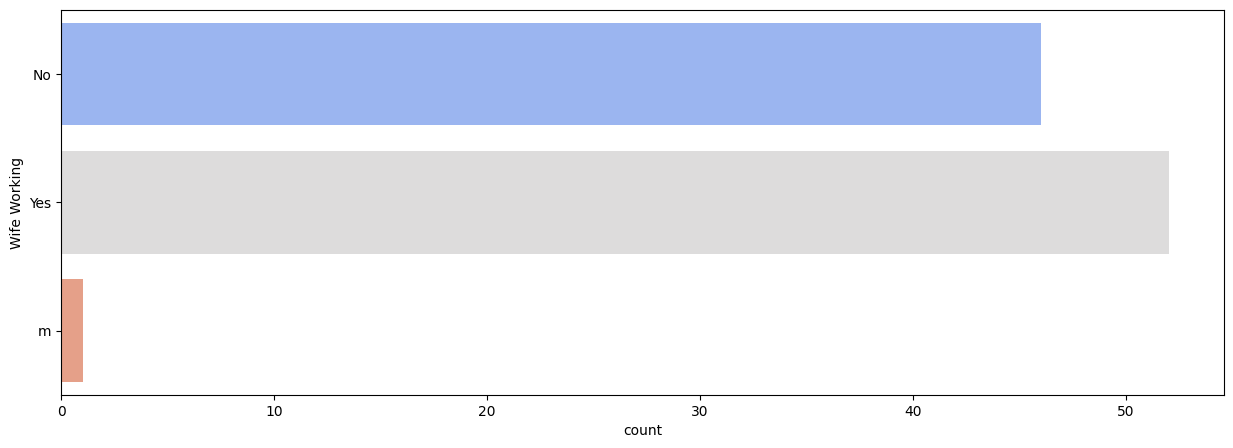

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(y='Wife Working', data=ev, hue='Wife Working', palette='coolwarm', legend=False)
plt.show()

**One of the values here is showing m which is an error. We will correct it to 'No'**

In [17]:
ev=ev.replace(to_replace ="m",value ="No")
ev.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


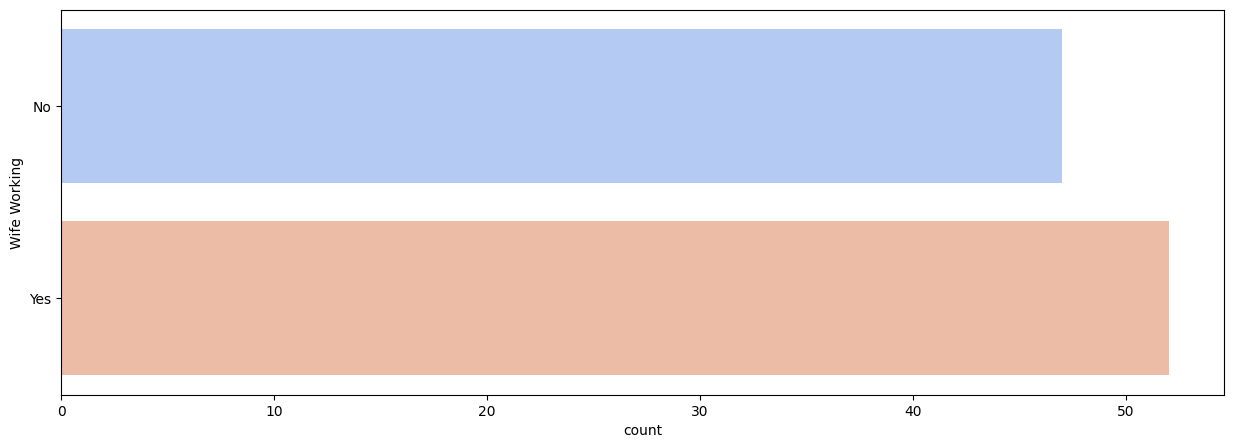

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(y='Wife Working', data=ev, hue='Wife Working', palette='coolwarm', legend=False)
plt.show()

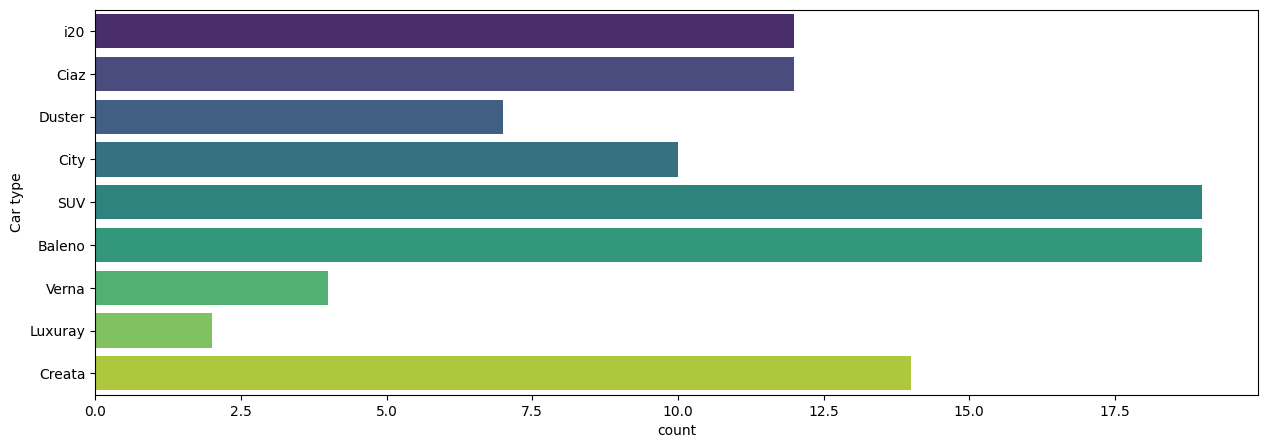

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(y='Make',data=ev, hue='Make', palette='viridis', legend=False)
plt.ylabel('Car type')
plt.show()

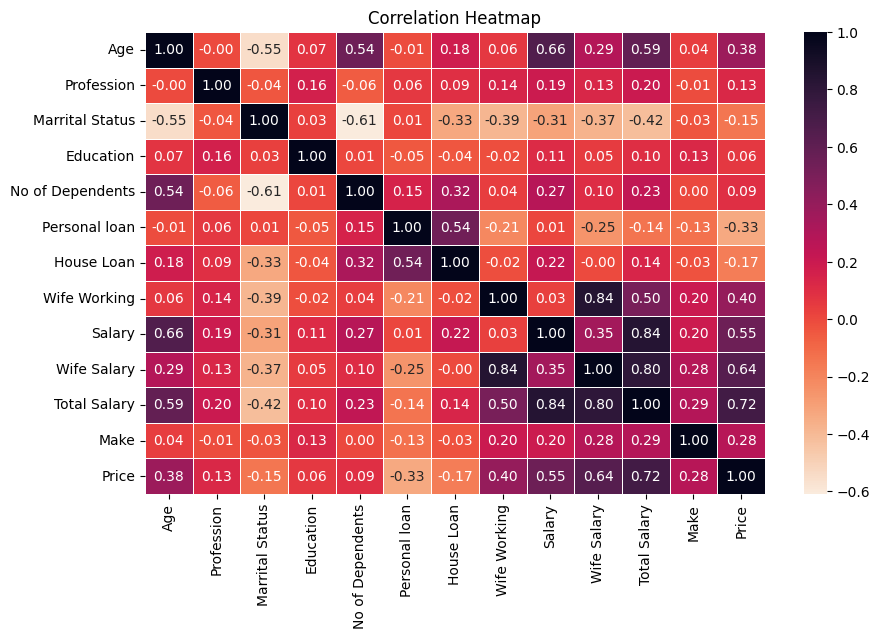

In [20]:
# Convert categorical columns to numeric
for col in ['Profession', 'Marrital Status', 'Education', 'Make', 'Personal loan', 'House Loan', 'Wife Working']:  
    ev[col] = LabelEncoder().fit_transform(ev[col])

#Heat Map
plt.figure(figsize=(10, 6))  
sns.heatmap(ev.corr(), annot=True, cmap='rocket_r', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='Make', ylabel='count'>

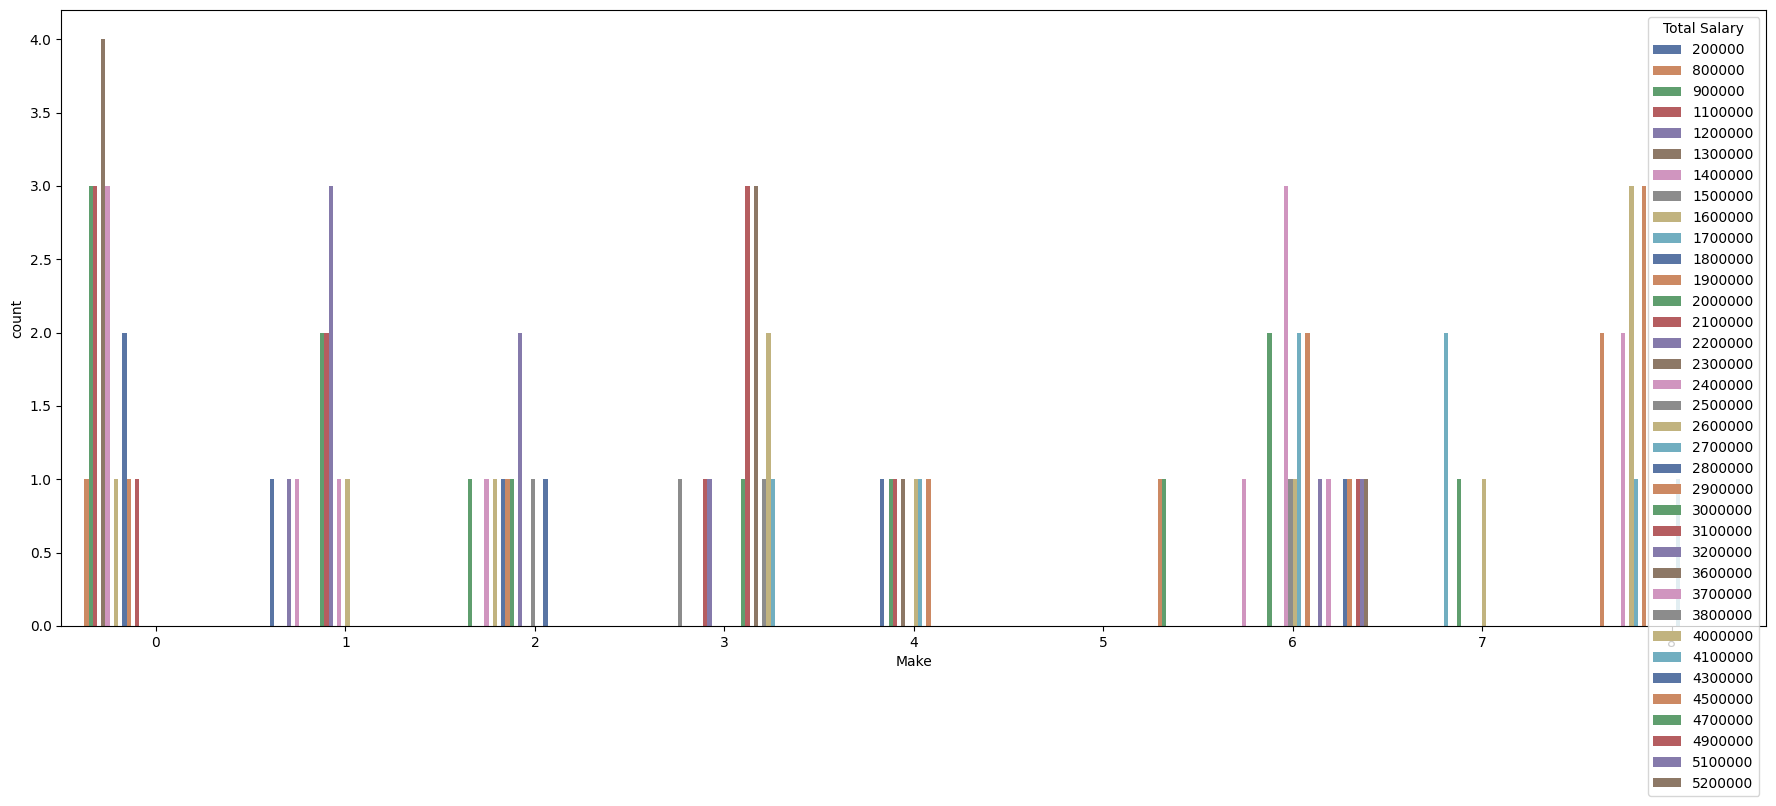

In [21]:
plt.figure(figsize=(22,8))
sns.countplot(x="Make", data=ev, hue="Total Salary", palette='deep')

<Axes: xlabel='Make', ylabel='count'>

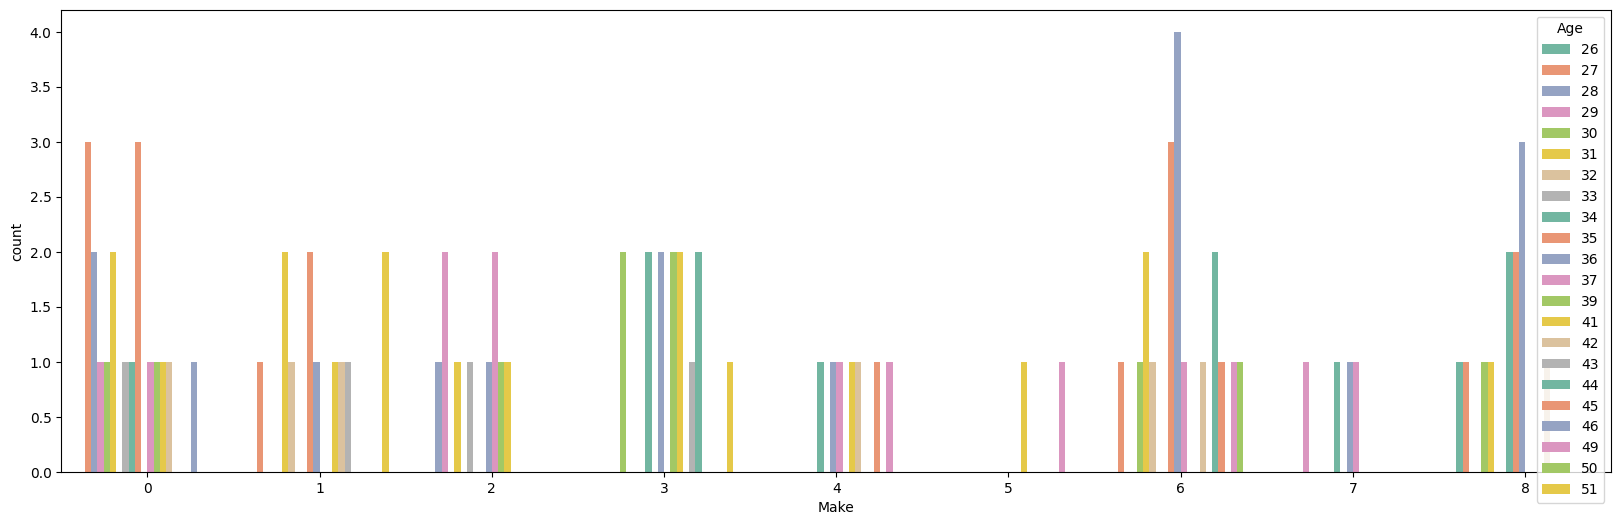

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=ev, hue="Age", palette='Set2')

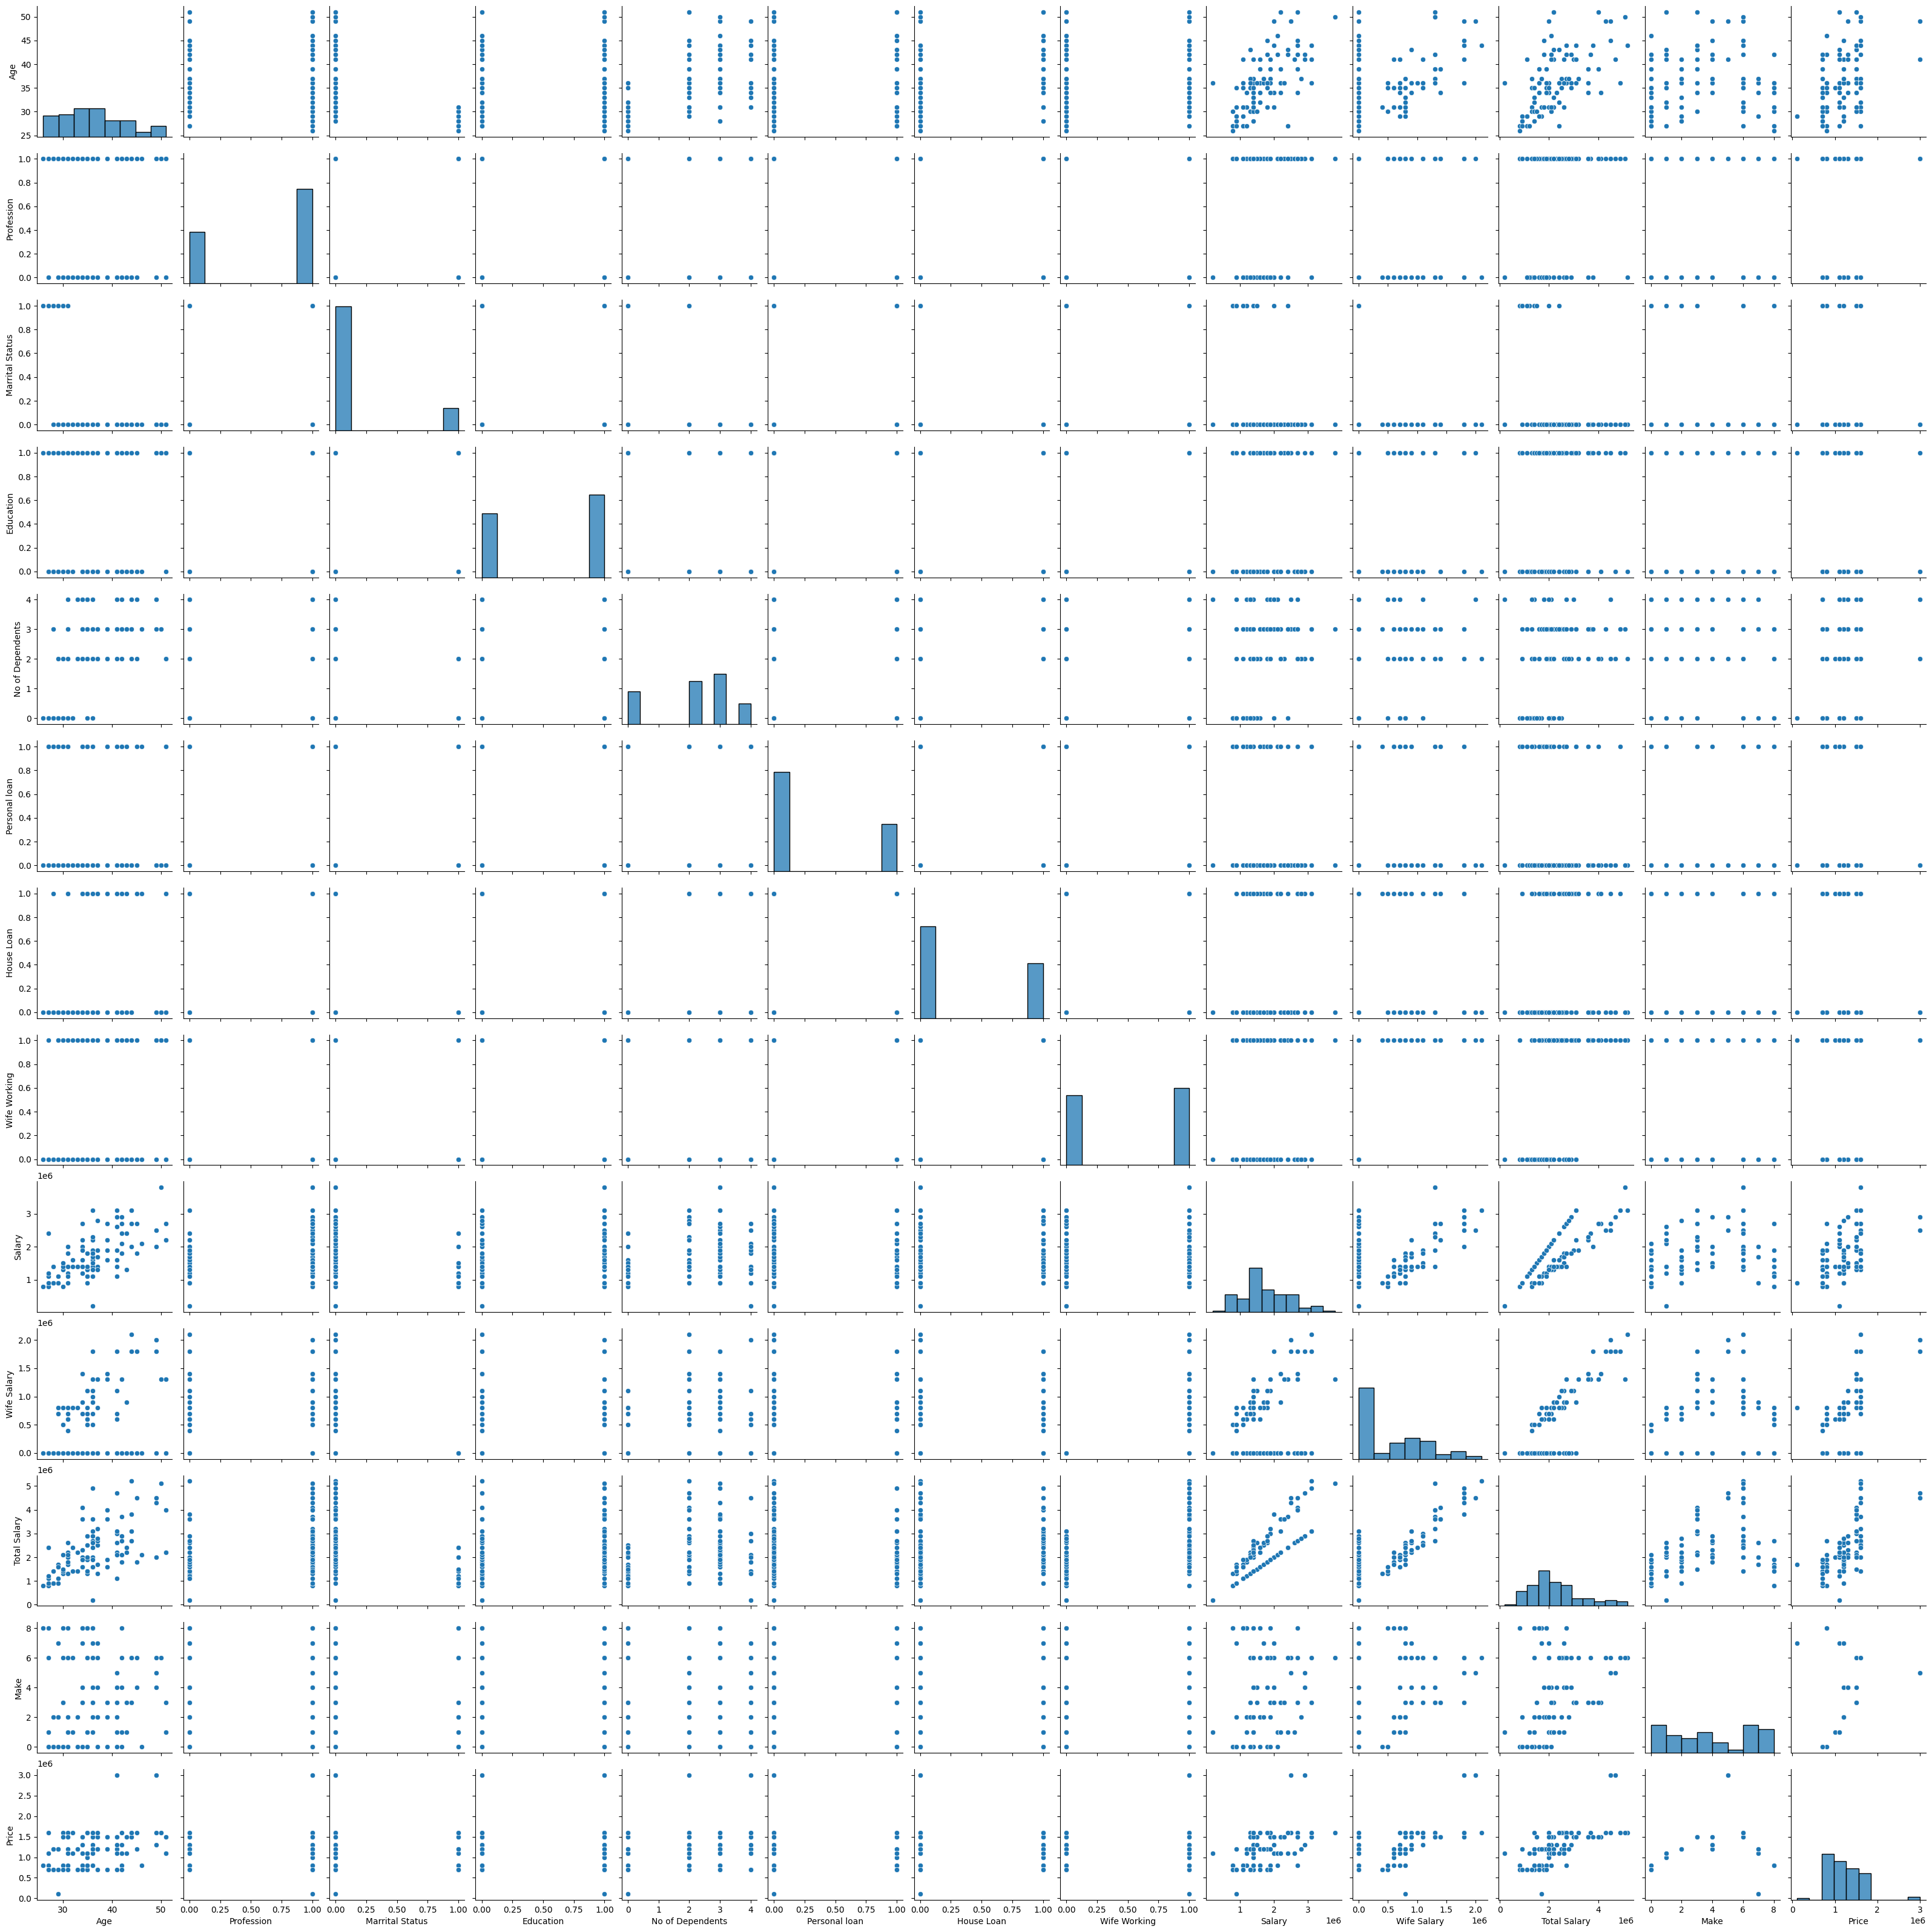

In [23]:
sns.pairplot(ev)

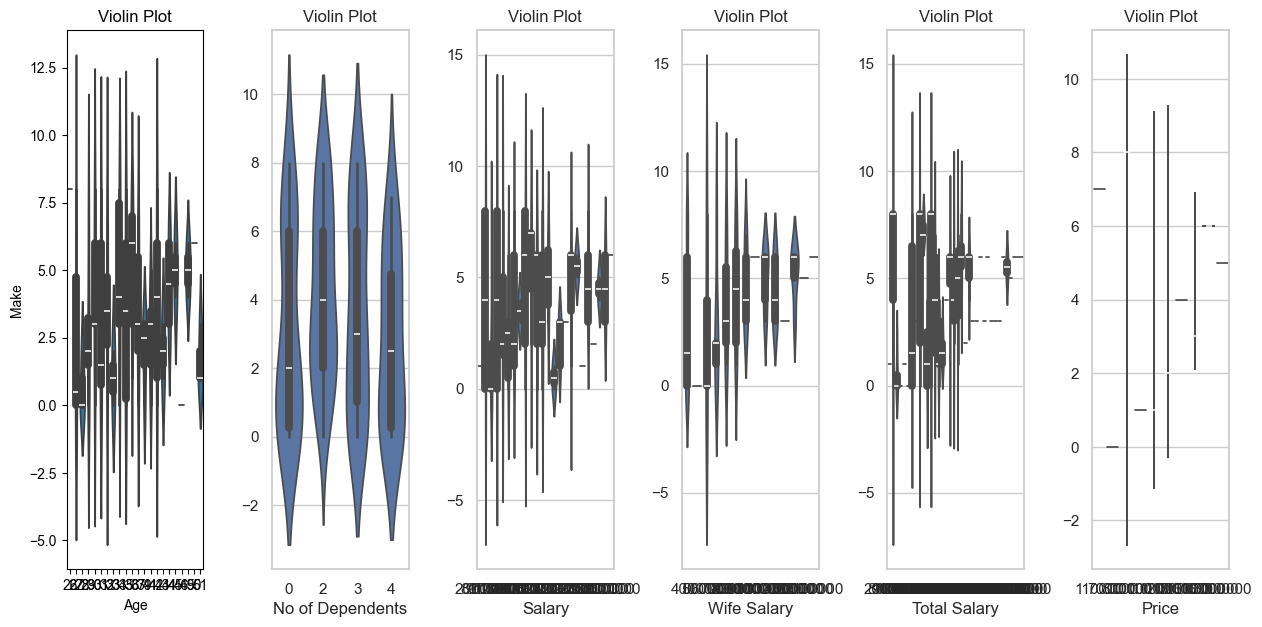

In [24]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','No of Dependents','Salary','Wife Salary','Total Salary','Price']:
  n += 1
  plt.subplot(1,6,n)
  sns.set(style = 'whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x= cols, y = 'Make', data=ev)
  plt.ylabel("Make" if n==1 else '')
  plt.title('Violin Plot')

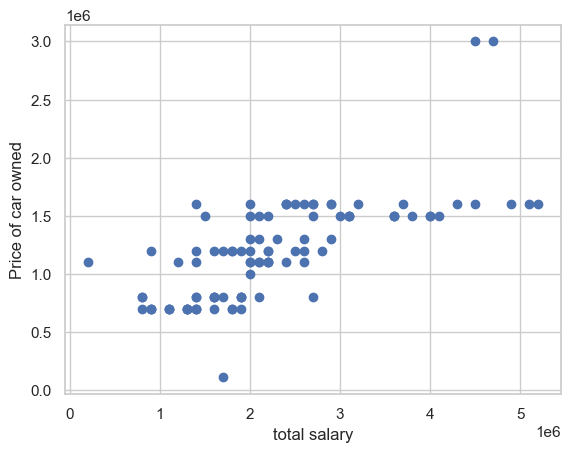

In [25]:
#Scatter plot
plt.xlabel('total salary')
plt.ylabel('Price of car owned')
plt.scatter(ev['Total Salary'], ev['Price'])

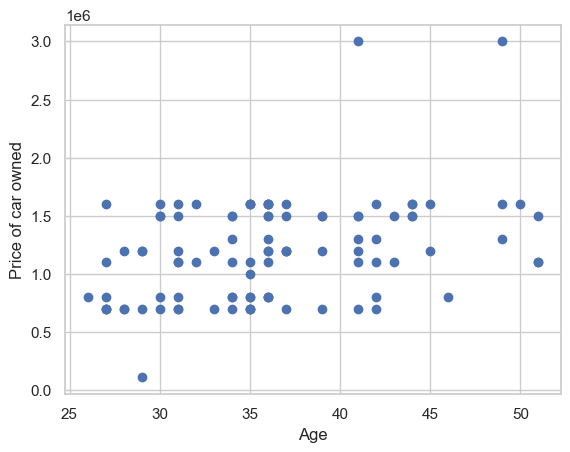

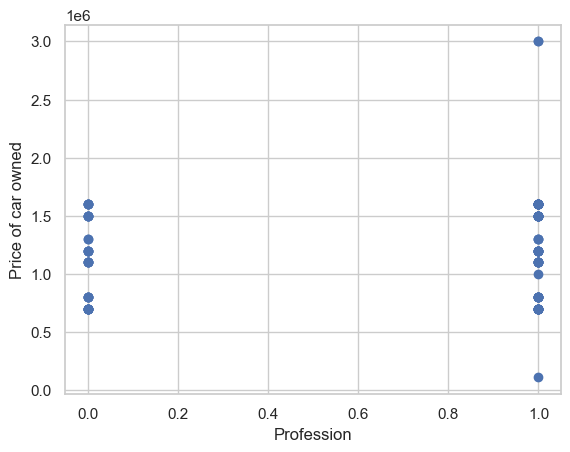

In [26]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(ev['Age'], ev['Price'])
plt.show()
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
plt.scatter(ev['Profession'], ev['Price'])
plt.show()

In [27]:
#Encoding the dataset
cols = ['Profession', 'Marrital Status', 'Education', 'Personal loan','House Loan','Wife Working']
ev[cols] = ev[cols].apply(LabelEncoder().fit_transform)
ev.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,8,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6,1600000


In [28]:
#Dropping Make columns
ev_price = ev.drop('Make',axis=1)
ev_price.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000


In [29]:
#Dropping the price column
ev_car = ev.drop('Price',axis=1)
ev_car.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,8
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6


In [30]:
#Encoding in ev_car
le = LabelEncoder()
ev_car.Make = le.fit_transform(ev_car.Make)
ev_car.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,8
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6


**<font size="5">Clustering</font>**

In [31]:
features = list(ev_price.columns)
d = ev_price[features]
features

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Personal loan',
 'House Loan',
 'Wife Working',
 'Salary',
 'Wife Salary',
 'Total Salary',
 'Price']

In [32]:
#K-Means algorithm
clustering_kmeans = KMeans(n_clusters=3, n_init="auto", random_state=1)
d['clusters'] = clustering_kmeans.fit_predict(d) 
d

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,27,1,1,1,0,1,0,0,800000,0,800000,800000,0
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000,2
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000,0
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000,2
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,2400000,1600000,2
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,1600000,1
96,51,0,0,0,2,1,1,0,2200000,0,2200000,1100000,2
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,1500000,1


Text(0, 0.5, 'Total salary')

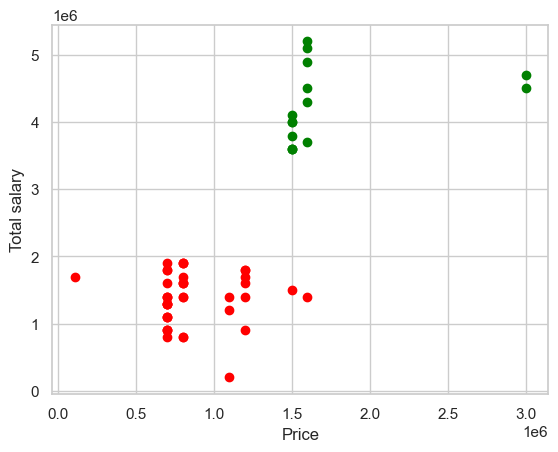

In [33]:
d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Price, d1['Total Salary'], color='green')
plt.scatter(d0.Price, d0['Total Salary'], color='red')
plt.xlabel('Price')
plt.ylabel('Total salary')

**<font size='5'>Scaling</font>**

In [34]:
x = d['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
d['Age']= x_scaled

In [35]:
x = d['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Salary']= x_scaled

In [36]:
x = d['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Wife Salary']= x_scaled


x = d['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Total Salary']= x_scaled


x = d['Price'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
d['Price']= x_scaled

In [37]:
d['clusters'] = clustering_kmeans.fit_predict(d) 
d

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,0
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,1
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,2
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,1
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,0
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,1
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,1
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,1


Text(0, 0.5, 'Total salary')

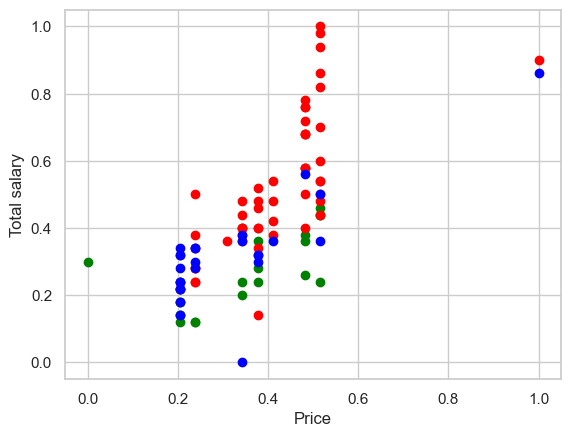

In [38]:
clustering_kmeans = KMeans(n_clusters=3)
d['clusters'] = clustering_kmeans.fit_predict(d) 


d1 = d[d.clusters==1]
d0 = d[d.clusters==0]

d2 = d[d.clusters==2]

plt.scatter(d1.Price, d1['Total Salary'], color='green')
plt.scatter(d0.Price, d0['Total Salary'], color='red')
plt.scatter(d2.Price, d2['Total Salary'], color='blue')

plt.xlabel('Price')
plt.ylabel('Total salary')

In [39]:
clustering_kmeans.cluster_centers_

array([[ 5.16078431e-01,  7.64705882e-01,  3.92156863e-02,
         5.88235294e-01,  2.43137255e+00,  3.33333333e-01,
         4.70588235e-01,  6.66666667e-01,  5.17429194e-01,
         3.66946779e-01,  5.26666667e-01,  4.21263315e-01,
         1.13725490e+00],
       [ 1.38181818e-01,  6.36363636e-01,  5.90909091e-01,
         5.45454545e-01,  8.88178420e-16,  1.81818182e-01,
        -5.55111512e-17,  4.09090909e-01,  2.89141414e-01,
         1.34199134e-01,  2.64545455e-01,  3.34853728e-01,
        -2.22044605e-16],
       [ 4.41538462e-01,  4.23076923e-01,  5.55111512e-17,
         5.38461538e-01,  3.53846154e+00,  4.23076923e-01,
         5.00000000e-01,  3.46153846e-01,  3.65384615e-01,
         1.35531136e-01,  3.20000000e-01,  3.18605270e-01,
         1.73076923e+00]])

In [40]:
k_range = range(1,10)

#sum of squared error
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(d)
  sse.append(km.inertia_)
print(sse)

[398.87653381463053, 248.297193681906, 151.97283655554315, 134.69700469163948, 127.08356304433255, 118.34810758180797, 103.72111637718007, 102.10039211711437, 99.51978969035352]


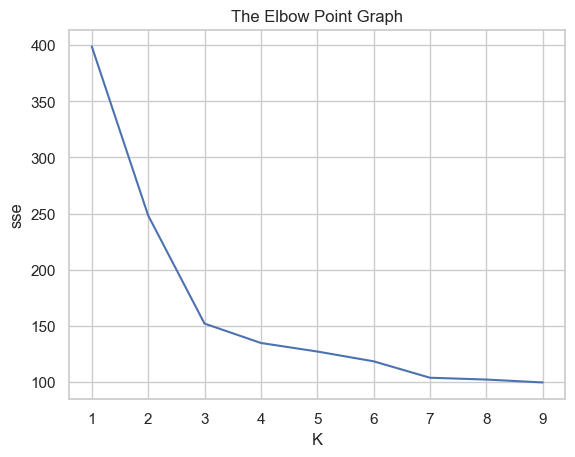

In [41]:
#Plotting Elbow graph
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse)

In [42]:
def plotseg(clus,Y, labels):  
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
  plt.scatter(clus[Y==2,0], clus[Y==2,1], s=10, c='black', label='Cluster 3')

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

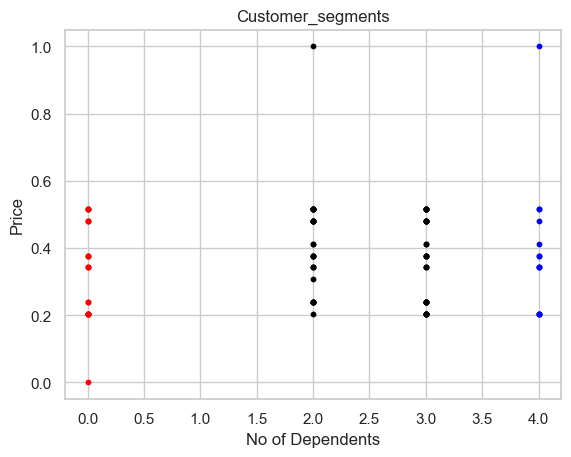

In [43]:
#Clustering No of Dependents & Price
clus = d.loc[:,["No of Dependents","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["No of Dependents","Price"])

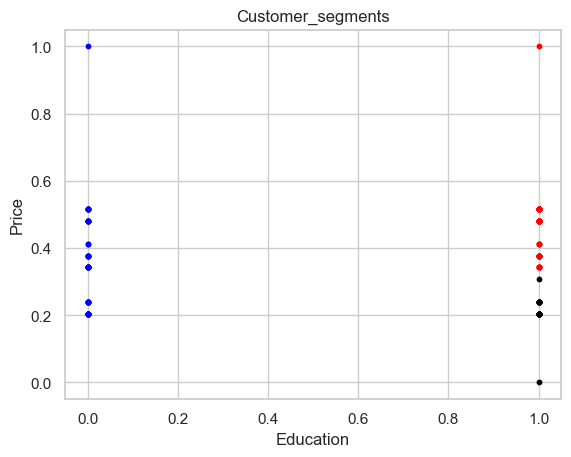

In [44]:
#Clustering Education & Price
clus = d.loc[:,["Education","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Education","Price"]) 

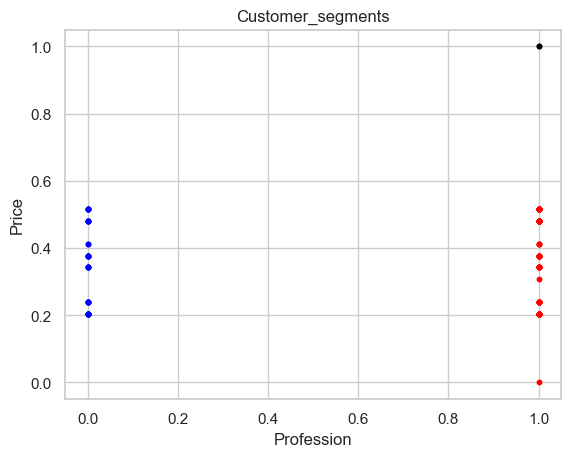

In [45]:
#Clustering profession & Price
clus = d.loc[:,["Profession","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Profession","Price"])

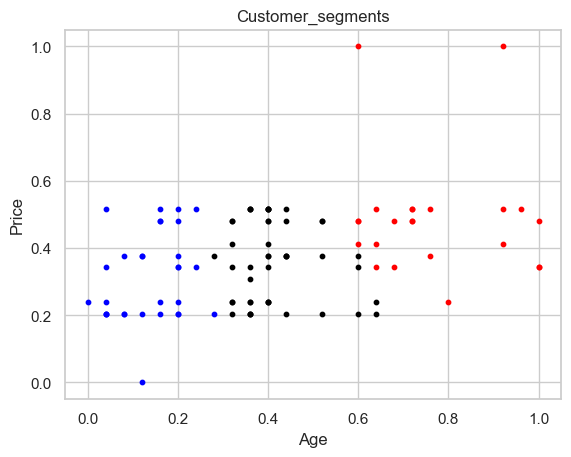

In [46]:
#Clustering Age & Price
clus = d.loc[:,["Age","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Age","Price"]) 

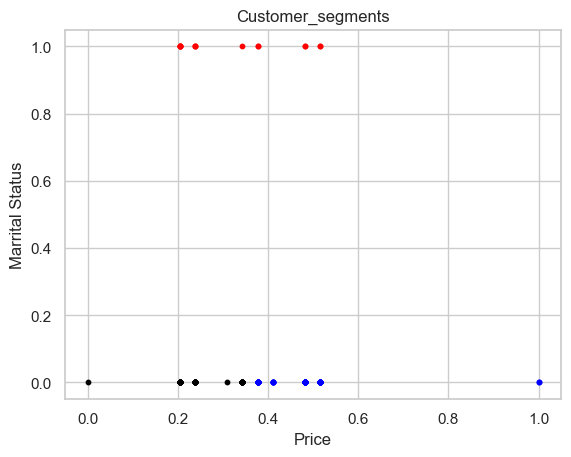

In [47]:
#Clustering Price & Marital Status
clus = d.loc[:,["Price","Marrital Status"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Price","Marrital Status"]) 

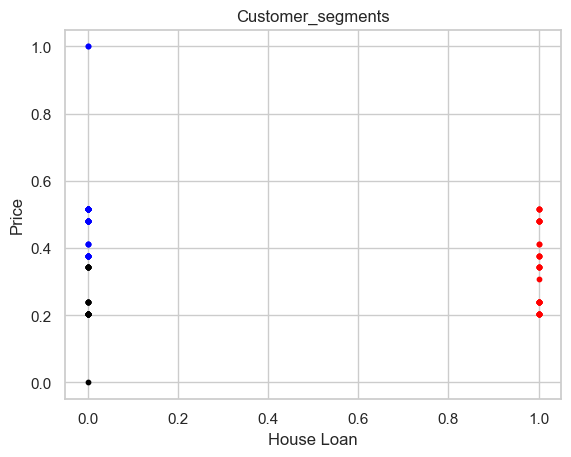

In [48]:
#Clustering House Loan & Price
clus = d.loc[:,["House Loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["House Loan","Price"]) 

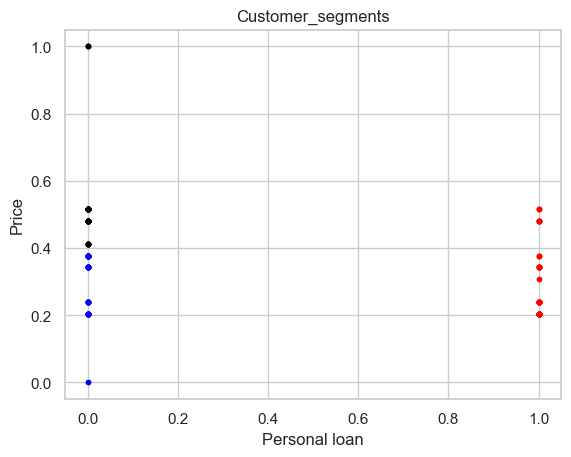

In [49]:
#Clustering Personal loan & Price
clus = d.loc[:,["Personal loan","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Personal loan","Price"]) 

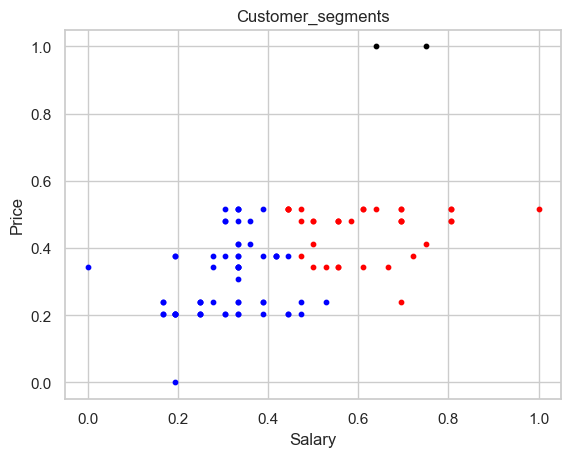

In [50]:
#Clustering Salary & Price
clus = d.loc[:,["Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Salary","Price"])

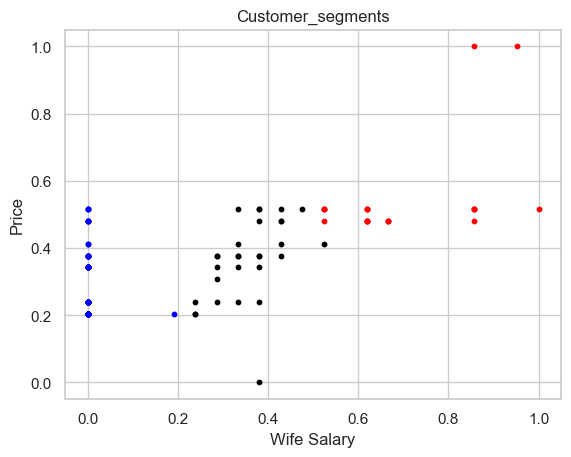

In [51]:
#Clustering Wife Salary & Price
clus = d.loc[:,["Wife Salary","Price"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotseg(clus, Y, ["Wife Salary","Price"]) 

In [52]:
clustering_kmeans = KMeans(n_clusters=3, n_init="auto", random_state=2)
d['clusters'] = clustering_kmeans.fit_predict(d) 
d

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,2
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,1
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,0
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,1
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,0.611111,0.000000,0.44,0.515571,2
95,0.96,1,0,1,3,0,0,1,1.000000,0.619048,0.98,0.515571,1
96,1.00,0,0,0,2,1,1,0,0.555556,0.000000,0.40,0.342561,1
97,1.00,1,0,1,2,0,0,1,0.694444,0.619048,0.76,0.480969,1


In [53]:
labels = clustering_kmeans.labels_
labels

array([2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1], dtype=int32)

**<font size='5'>3-D visualization-Age, Salary, Price</font>**

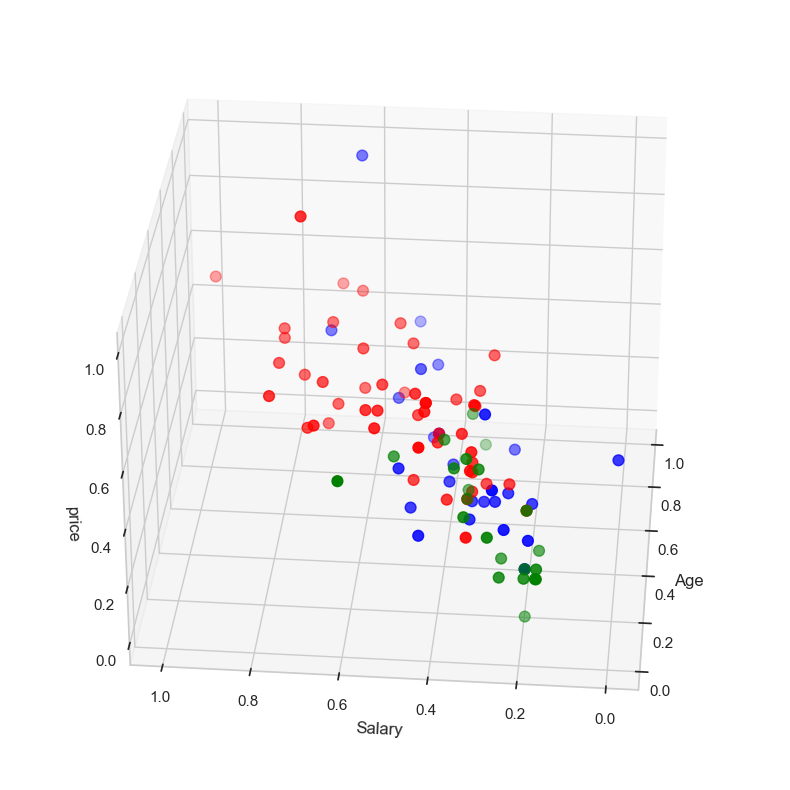

In [55]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Salary"][labels == 0], d["Price"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Salary"][labels == 1], d["Price"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Salary"][labels == 2], d["Price"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

**<font size="5">3-D visualization-Price, No of Dependents, Total Salary</font>**

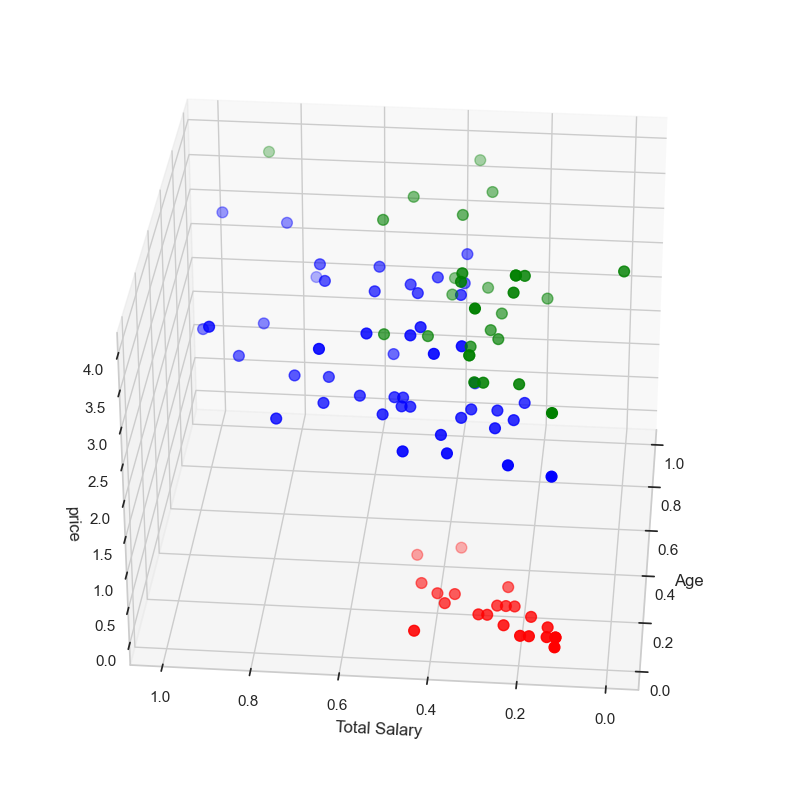

In [130]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(d.Age[labels == 0], d["Total Salary"][labels == 0], d["No of Dependents"][labels == 0],  c='blue', s=60)
ax.scatter(d.Age[labels == 1], d["Total Salary"][labels == 1], d["No of Dependents"][labels == 1],  c='red', s=60)
ax.scatter(d.Age[labels == 2], d["Total Salary"][labels == 2], d["No of Dependents"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Total Salary")
ax.set_zlabel('price')
plt.show()

**<font size='5'>Observation:</font>**

**1.We found that 3 clusters groups can be formed from the data given(based on price of the vehicle) using the K-Means algorithm and Elbow Point Method.**

**2.While looking at the patterns, we find that as the Age increases the cost of the vehicle also rises.**

**3.The amount spent on the car goes up with the number of dependents.**

**4.As the salary increses the amount spent on car also increases.**

**5.he visualizations provided gives a clear idea about the patterns.**

**<font size='5'>Clustering according to the type and model of vehicle owned.</font>**

In [132]:
feature = list(ev_car.columns)
dc = ev_car[feature]
dc

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,27,1,1,1,0,1,0,0,800000,0,800000,8
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,0,1,0,0,0,0,0,2400000,0,2400000,6
95,50,1,0,1,3,0,0,1,3800000,1300000,5100000,6
96,51,0,0,0,2,1,1,0,2200000,0,2200000,1
97,51,1,0,1,2,0,0,1,2700000,1300000,4000000,3


In [133]:
#Scaling
x = dc['Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Salary']= x_scaled


x = dc['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
dc['Age']= x_scaled


x = dc['Wife Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Wife Salary']= x_scaled


x = dc['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
dc['Total Salary']= x_scaled

In [135]:
#After Scaling
dc.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,8
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,1
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,4
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,2
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,6


In [137]:
k_range1 = range(1,10)

#sum of squared error
ssec = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(dc)
  ssec.append(km.inertia_)

print(ssec)

[1076.568039936783, 481.82717494193787, 418.95369142384504, 331.1884371584176, 250.0476189388507, 202.73577880733689, 188.74794092383405, 182.72350537893647, 171.32944380870362]


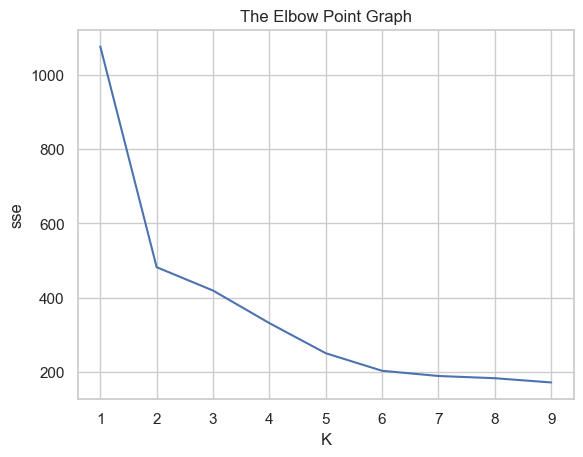

In [138]:
#Elbow Graph
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range1,ssec)

**<font size="5">Here the elbow point is 2.</font>**

In [139]:
def plotsegm(clus,Y, labels):  
  plt.scatter(clus[Y==0,0], clus[Y==0,1], s=10, c='blue', label='Cluster 1')
  plt.scatter(clus[Y==1,0], clus[Y==1,1], s=10, c='red', label='Cluster 2')
  

  plt.title('Customer_segments')
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

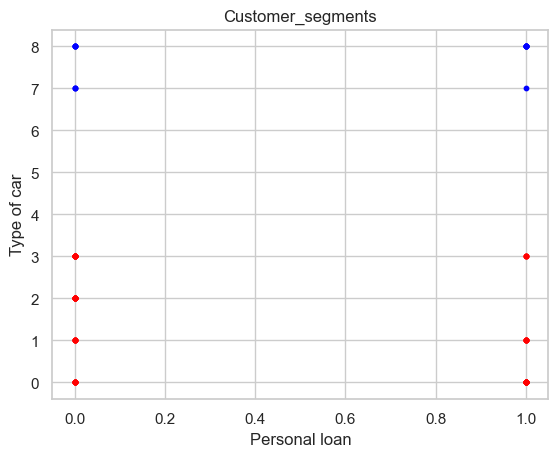

In [143]:
#Clustering Personal loan & Type of car
clus = dc.loc[:,["Personal loan","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Personal loan","Type of car"])

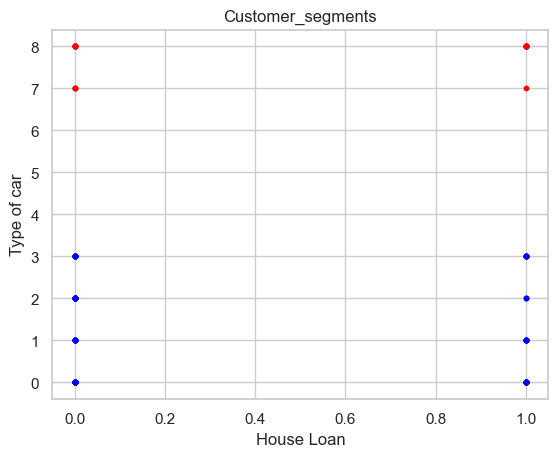

In [142]:
#Clustering House Loan & Type of car
clus = dc.loc[:,["House Loan","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["House Loan","Type of car"])

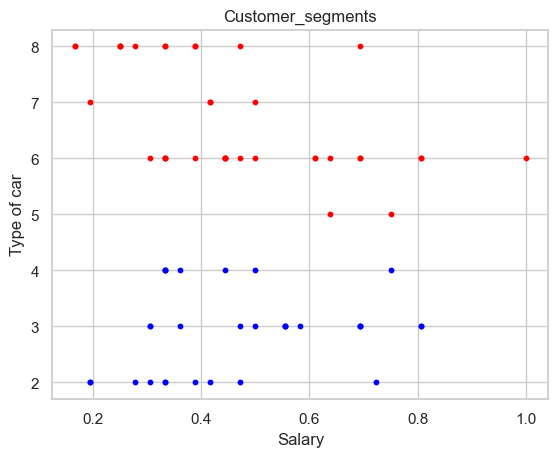

In [144]:
#Clustering Salary & Type of car
clus = dc.loc[:,["Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Salary","Type of car"])

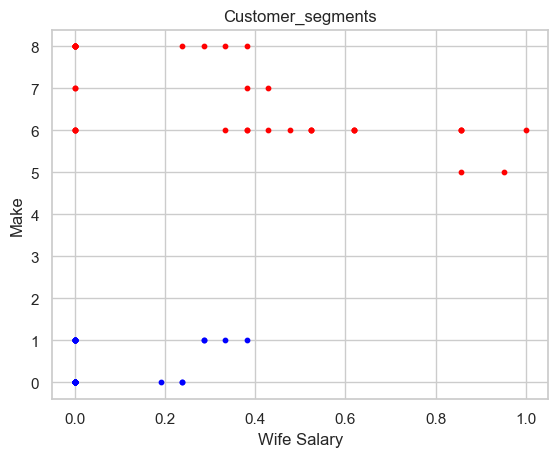

In [145]:
#Clustering Wife Salary & Make
clus = dc.loc[:,["Wife Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Wife Salary","Make"])

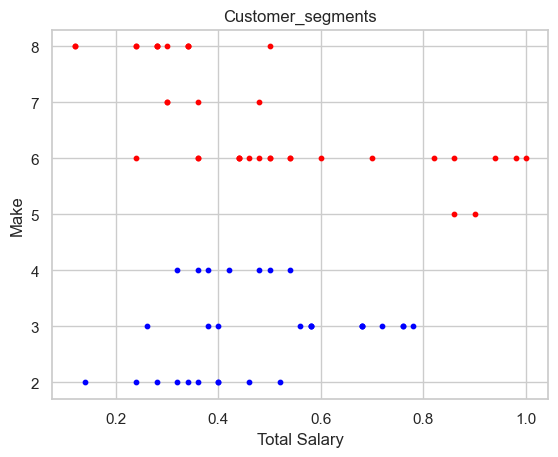

In [146]:
#Clustering Total Salary & Make
clus = dc.loc[:,["Total Salary","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Total Salary","Make"])

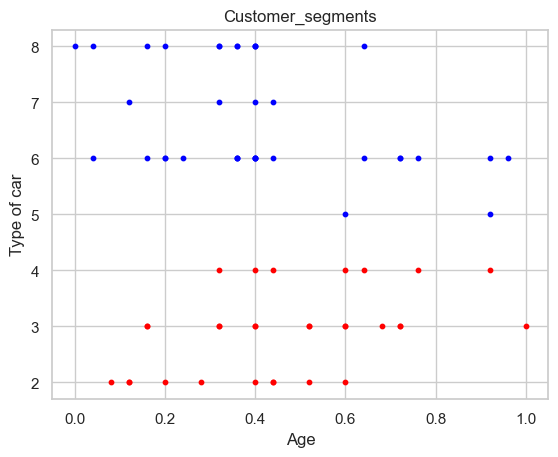

In [147]:
#Clustering Age & Make
clus = dc.loc[:,["Age","Make"]].values
kmeans = KMeans(n_clusters=3, init='k-means++')

Y = kmeans.fit_predict(clus)
plotsegm(clus, Y, ["Age","Type of car"])

**<font size="5">3-D visulaization-Price, Salary, Age</font>**

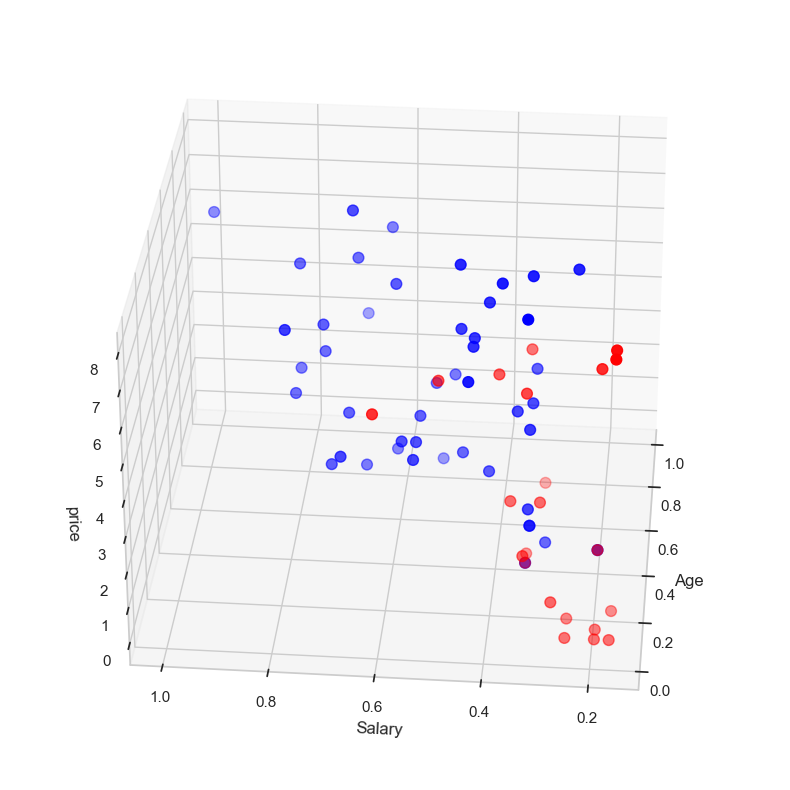

In [148]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(dc.Age[labels == 0], dc["Salary"][labels == 0], dc["Make"][labels == 0],  c='blue', s=60)
ax.scatter(dc.Age[labels == 1], dc["Salary"][labels == 1], dc["Make"][labels == 1],  c='red', s=60)
#ax.scatter(dc.Age[labels == 2], dc["Salary"][labels == 2], dc["Make"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Salary")
ax.set_zlabel('price')
plt.show()

In [149]:
#Displaying the rows of cluster 1
p=d[d.clusters==1]
p

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
0,0.04,1,1,1,0,1,0,0,0.166667,0.000000,0.12,0.238754,1
12,0.12,1,0,1,0,0,0,1,0.194444,0.380952,0.30,0.000000,1
16,0.00,1,1,1,0,0,0,0,0.166667,0.000000,0.12,0.238754,1
17,0.04,1,1,0,0,1,0,1,0.166667,0.000000,0.12,0.204152,1
19,0.16,1,0,0,0,0,0,1,0.166667,0.238095,0.22,0.204152,1
36,0.12,0,0,1,0,0,0,1,0.194444,0.333333,0.28,0.377163,1
37,0.16,1,0,1,0,0,0,1,0.305556,0.380952,0.38,0.480969,1
38,0.16,0,1,1,0,0,0,0,0.333333,0.000000,0.24,0.515571,1
39,0.20,1,0,0,0,0,0,1,0.333333,0.380952,0.40,0.342561,1
41,0.24,0,0,1,0,0,0,0,0.333333,0.000000,0.24,0.342561,1


In [150]:
#Checking Shape
p.shape

(22, 13)

In [151]:
#Displaying the rows of cluster 0
q=d[d.clusters==0]
q

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
1,0.36,1,0,1,2,1,1,1,0.333333,0.285714,0.36,0.307958,0
4,0.20,1,0,1,2,1,0,1,0.444444,0.380952,0.48,0.515571,0
13,0.16,0,1,1,2,1,0,0,0.333333,0.000000,0.24,0.238754,0
18,0.12,1,1,1,2,0,0,0,0.194444,0.000000,0.14,0.377163,0
20,0.44,1,0,1,3,0,1,1,0.416667,0.380952,0.46,0.377163,0
24,0.36,1,0,0,3,1,0,1,0.333333,0.285714,0.36,0.342561,0
25,0.36,1,0,0,2,0,0,1,0.444444,0.523810,0.54,0.515571,0
28,0.40,1,0,1,3,1,1,1,0.416667,0.428571,0.48,0.377163,0
29,0.40,1,0,1,2,0,0,1,0.444444,0.428571,0.50,0.515571,0
31,0.60,1,0,0,3,0,0,1,0.333333,0.333333,0.38,0.411765,0


In [152]:
#Checking Shape
q.shape

(47, 13)

In [153]:
#Displayig the rows of cluster 2
r=d[d.clusters==2]
r

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,clusters
2,0.76,0,0,0,4,1,1,0,0.444444,0.000000,0.32,0.377163,2
3,0.60,0,0,1,3,0,0,1,0.388889,0.285714,0.40,0.377163,2
5,0.08,1,0,0,3,1,1,0,0.194444,0.000000,0.14,0.204152,2
6,0.20,1,0,0,4,0,0,1,0.277778,0.285714,0.32,0.377163,2
7,0.28,0,0,1,4,0,0,0,0.333333,0.000000,0.24,0.204152,2
8,0.32,0,0,1,4,0,0,0,0.500000,0.000000,0.36,0.342561,2
9,0.32,1,0,0,3,1,1,1,0.277778,0.333333,0.34,0.238754,2
10,0.36,1,0,1,4,0,0,1,0.305556,0.333333,0.36,0.515571,2
11,0.36,1,0,0,4,1,1,0,0.333333,0.000000,0.24,0.204152,2
14,0.20,0,0,0,3,1,1,1,0.194444,0.190476,0.22,0.204152,2


In [154]:
#Checking Shape
r.shape

(30, 13)

**Out of a total of 99 rows.**

**Cluster 0 - 22 rows**

**Cluster 1 - 38 rows**

**Cluster 2 - 39 rows**